### Polynomial Regression


In [6]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
m = 100
X = 6*np.random.rand(m, 1)-3
y = 0.5 * X**2 + X + 2+np.random.randn(m, 1)

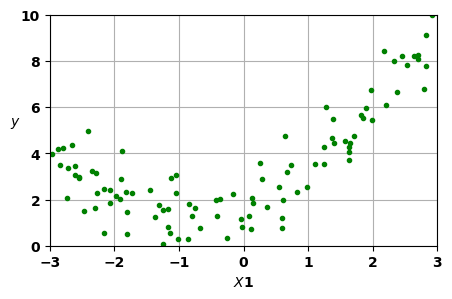

In [11]:
plt.figure(figsize=(5, 3))
plt.plot(X, y, 'g.')
plt.xlabel('$X1$')
plt.ylabel('$y$', rotation=0)
plt.axis([-3, 3, 0, 10])
plt.grid()
plt.show()

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error

model = LinearRegression()
model.fit(X, y)
print('intercept: ', model.intercept_)
print('coef: ', model.coef_)

intercept:  [3.56401543]
coef:  [[0.84362064]]


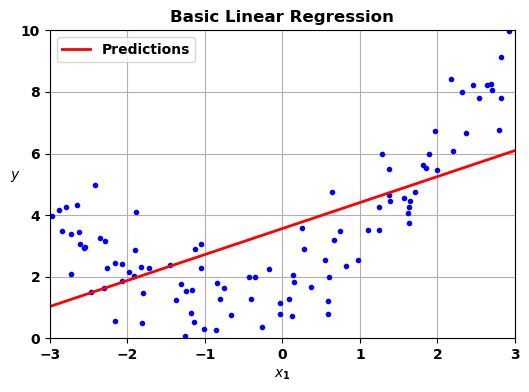

In [24]:
X_new = np.linspace(-3, 3, 100).reshape(100, 1)
y_predicted = model.predict(X_new)

plt.figure(figsize=(6, 4))
plt.plot(X, y, "b.")
plt.plot(X_new, y_predicted, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.legend(loc="upper left")
plt.axis([-3, 3, 0, 10])
plt.grid()
plt.title('Basic Linear Regression')
plt.show()

In [25]:
print(np.sqrt(mean_squared_error(y, y_predicted)))

2.6985793899233905


#### Try with Polynomial Features

In [37]:
poly = PolynomialFeatures(degree=2, include_bias=False)
xpoly = poly.fit_transform(X)
print(X[0])
print(xpoly[0])

[-0.75275929]
[-0.75275929  0.56664654]


In [38]:
model = LinearRegression()
model.fit(xpoly, y)
print('intercept: ', model.intercept_)
print('coef: ', model.coef_)

intercept:  [1.78134581]
coef:  [[0.93366893 0.56456263]]


>note that coefficient close to what X really are

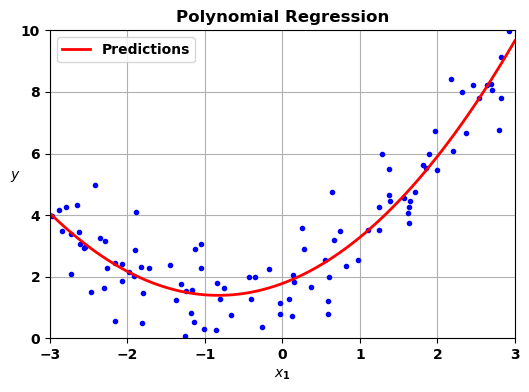

In [47]:

X_new = np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly.transform(X_new)
y_predicted_with_poly = model.predict(X_new_poly)

plt.figure(figsize=(6, 4))
plt.plot(X, y, "b.")
plt.plot(X_new, y_predicted_with_poly, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.legend(loc="upper left")
plt.axis([-3, 3, 0, 10])
plt.grid()
plt.title('Polynomial Regression')
plt.show()

In [48]:
print(np.sqrt(mean_squared_error(y, y_predicted_with_poly)))

3.2341978125459754


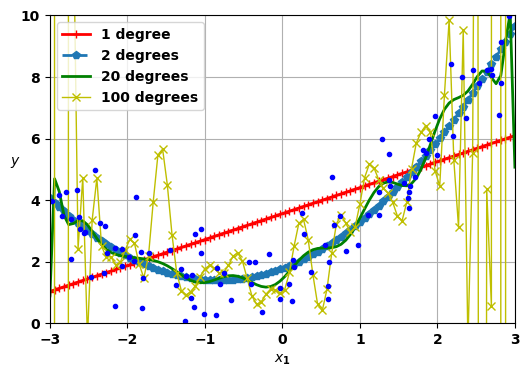

In [66]:
from sklearn.preprocessing import StandardScaler

plt.figure(figsize=(6, 4))

for style, width, degree in (("r-+", 2, 1), ("p--", 2, 2), ("g-", 2, 20), ("y-x", 1, 100)):
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = make_pipeline(
        polybig_features, std_scaler, lin_reg)
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    label = f"{degree} degree{'s' if degree > 1 else ''}"
    plt.plot(X_new, y_newbig, style, label=label, linewidth=width)

plt.plot(X, y, "b.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([-3, 3, 0, 10])
plt.grid()
plt.show()

#### Learning Curve

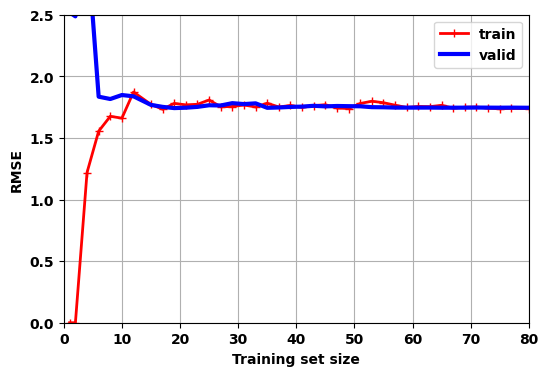

In [84]:
from sklearn.model_selection import learning_curve

train_sizes, train_score, validate_score = learning_curve(LinearRegression(), X, y,
                                                          train_sizes=np.linspace(0.01, 1.0, 40), cv=5, scoring='neg_root_mean_squared_error')
train_errors = -train_score.mean(axis=1)
valid_errors = -validate_score.mean(axis=1)

plt.figure(figsize=(6, 4))  # extra code – not needed, just formatting
plt.plot(train_sizes, train_errors, "r-+", linewidth=2, label="train")
plt.plot(train_sizes, valid_errors, "b-", linewidth=3, label="valid")

# extra code – beautifies and saves Figure 4–15
plt.xlabel("Training set size")
plt.ylabel("RMSE")
plt.grid()
plt.legend(loc="upper right")
plt.axis([0, 80, 0, 2.5])

plt.show()

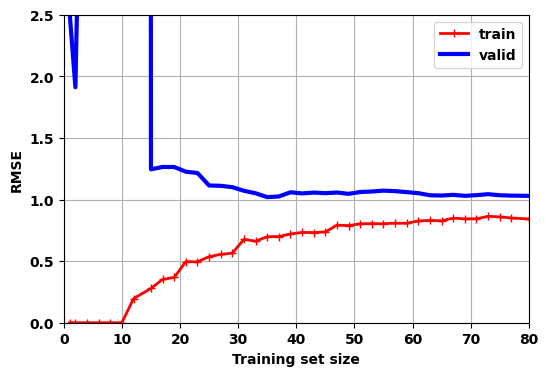

In [90]:
poly_regression = make_pipeline(PolynomialFeatures(
    degree=10, include_bias=False), LinearRegression())


train_sizes, train_scores, valid_scores = learning_curve(
    poly_regression, X, y, train_sizes=np.linspace(0.01, 1.0, 40), cv=5,
    scoring="neg_root_mean_squared_error")

train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

plt.figure(figsize=(6, 4))
plt.plot(train_sizes, train_errors, "r-+", linewidth=2, label="train")
plt.plot(train_sizes, valid_errors, "b-", linewidth=3, label="valid")
plt.legend(loc="upper right")
plt.xlabel("Training set size")
plt.ylabel("RMSE")
plt.grid()
plt.axis([0, 80, 0, 2.5])
plt.show()